<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/main/Computational%20Quantum%20Mechanics/ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from scipy.ndimage import convolve, generate_binary_structure

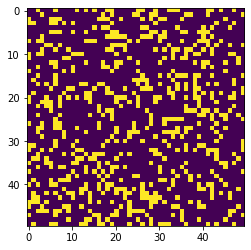

In [10]:
N = 50
init_random = np.random.random((N,N))
config = np.zeros((N,N))
config[init_random >= 0.75] = 1
config[init_random < 0.75] = -1

plt.imshow(config)

In [11]:
import copy 
@jit(nopython=True, nogil=True)
def mcmove(config, beta):
  i = np.random.randint(0, N)
  j = np.random.randint(0, N)
  s =  config[i, j]
  nb = config[(i+1)%N,j] + config[i,(j+1)%N] + config[(i-1)%N,j] + config[i,(j-1)%N]
  plaq = config[(i+1)%N, j]*config[i, (j+1)%N]*config[(i+1)%N, (j+1)%N] + config[(i+1)%N, j]*config[i, (j-1)%N]*config[(i+1)%N, (j-1)%N] + config[(i-1)%N, j]*config[i, (j+1)%N]*config[(i-1)%N, (j+1)%N] + config[(i-1)%N, j]*config[i, (j-1)%N]*config[(i-1)%N, (j-1)%N]
  cost = 2*s*(nb+0.2*plaq)
  if cost < 0:
    s *= -1
  elif cost >= 0 and np.random.random() < np.exp(-cost*beta):
    s *= -1
  config[i, j] = s
  return config

def mcmove1(config, beta):
  i = np.random.randint(0, N)
  j = np.random.randint(0, N)
  s =  config[i, j]
  nb = config[(i+1)%N,j] + config[i,(j+1)%N] + config[(i-1)%N,j] + config[i,(j-1)%N]
 # plaq = config[(i+1)%N, j]*config[i, (j+1)%N]*config[(i+1)%N, (j+1)%N] + config[(i+1)%N, j]*config[i, (j-1)%N]*config[(i+1)%N, (j-1)%N] + config[(i-1)%N, j]*config[i, (j+1)%N]*config[(i-1)%N, (j+1)%N] + config[(i-1)%N, j]*config[i, (j-1)%N]*config[(i-1)%N, (j-1)%N]
  cost = 2*s*(nb)
  if cost < 0:
    s *= -1
  elif cost >= 0 and np.random.random() < np.exp(-cost*beta):
    s *= -1
  config[i, j] = s
  return config

def calcEnergy(config):
   #Energy of a given configuration (dimensionless)!
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] 
            plaq = config[(i+1)%N, j]*config[i, (j+1)%N]*config[(i+1)%N, (j+1)%N] + config[(i+1)%N, j]*config[i, (j-1)%N]*config[(i+1)%N, (j-1)%N] + config[(i-1)%N, j]*config[i, (j+1)%N]*config[(i-1)%N, (j+1)%N] + config[(i-1)%N, j]*config[i, (j-1)%N]*config[(i-1)%N, (j-1)%N]
            energy += -(nb + 0.2*plaq)*S
    return energy/4

def calcEnergy1(config):
   #Energy of a given configuration (dimensionless)!
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] 
        #    plaq = config[(i+1)%N, j]*config[i, (j+1)%N]*config[(i+1)%N, (j+1)%N] + config[(i+1)%N, j]*config[i, (j-1)%N]*config[(i+1)%N, (j-1)%N] + config[(i-1)%N, j]*config[i, (j+1)%N]*config[(i-1)%N, (j+1)%N] + config[(i-1)%N, j]*config[i, (j-1)%N]*config[(i-1)%N, (j-1)%N]
            energy += -(nb)*S
    return energy/4

def calcMag(config):
    #Magnetization of a given configuration
    mag = np.sum(config)
    return mag
  
def metropolis(config,beta):
  for _ in range(100000):
    mcmove(config, beta)
  return config
def metropolis1(config,beta):
  for _ in range(100000):
    mcmove1(config, beta)
  return config
B = np.arange(0.1, 3, 0.02)
k = copy.deepcopy(config)
mag = []
energy_plaq = []
for beta in B:
  metropolis(config, beta)
  mag.append(calcMag(config))
  energy_plaq.append(calcEnergy(config))
  config = k

energy_normal = []
for beta in B:
  metropolis1(config, beta)
  energy_normal.append(calcEnergy1(config))
  config = k

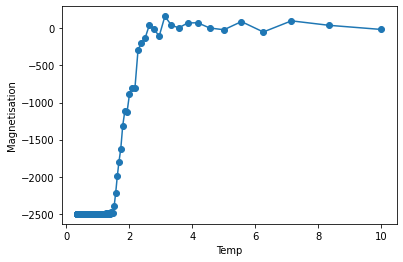

In [12]:
plt.scatter(1/np.array(B), mag)
plt.plot(1/np.array(B), mag)
plt.xlabel('Temp')
plt.ylabel('Magnetisation')
plt.savefig('stuff.png')

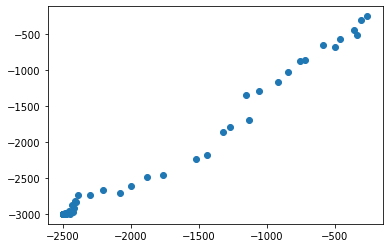

In [13]:
from scipy.optimize import curve_fit
plt.scatter(energy_normal, energy_plaq)
def f(x,a,b):
  return a*x + b
popt, pcov = curve_fit(f, energy_normal, energy_plaq)

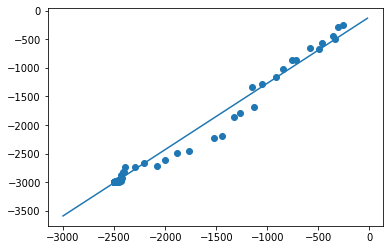

In [14]:
x = np.arange(-3000, 0, 20)
y = f(x, *popt)
plt.plot(x,y)
plt.scatter(energy_normal, energy_plaq)


In [15]:
popt

array([   1.15941048, -111.18522617])